In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_excel('Antenna_Final.xls')

In [14]:
df.head()
freq, S11

,Material,Mat_ID,Permitivity Constant,LT,Thickness,Width_Dimension,Length Dimension,G_width,G_length,Frequency,Effective Dielectric,W-H Ratio,Feed,X-pos,Y-pos,Is_Dground,Is_Square,Gain
0,Flame Retardant,FR4,4.4,0.002,1.53,18.0,13.0,27.18,22.18,4.930,3.896116,11.764706,Center Feed,6.586086,9.00,NO,NO,5
1,Flame Retardant,FR4,4.4,0.005,1.53,18.5,13.5,27.68,22.68,4.635,3.904362,12.091503,Center Feed,6.832171,9.25,NO,NO,6
2,Flame Retardant,FR4,4.4,0.002,1.53,19.0,14.0,28.18,23.18,4.620,3.912334,12.418301,Center Feed,7.077992,9.50,NO,NO,5
3,Flame Retardant,FR4,4.4,0.001,1.53,19.5,14.5,28.68,23.68,4.480,3.920045,12.745098,Center Feed,7.323564,9.75,NO,NO,6
4,Flame Retardant,FR4,4.4,0.005,1.53,20.0,15.0,29.18,24.18,4.385,3.927509,13.071895,Center Feed,7.568898,10.00,NO,NO,1


In [6]:
df.rename(columns={'s11(dB)':'Return_Loss','Freq(GHz)':'Freq','length of patch in mm':'Patch_length','width of patch in mm':'Patch_Width',
                  'Slot length in mm':'Slot_Length','slot width in mm':'Slot_Width'},inplace=True)

In [7]:
df.isnull().sum()

Freq            0
Patch_length    0
Patch_Width     0
Slot_Length     0
Slot_Width      0
Return_Loss     0
dtype: int64

In [8]:
df.sort_values('Freq',ignore_index=True,inplace=True)

In [9]:
df.query('Return_Loss < -10')
# df.query('Freq == 2.4')

,Freq,Patch_length,Patch_Width,Slot_Length,Slot_Width,Return_Loss
383,2.017241,31.0,32,85.0,115,-10.808005
415,2.068966,31.0,32,85.0,115,-12.211868
452,2.120690,31.0,32,85.0,115,-13.376440
485,2.172414,31.0,32,85.0,115,-14.659719
516,2.224138,31.0,32,85.0,115,-16.282618
517,2.224138,33.0,33,0.0,0,-10.202952
548,2.275862,31.0,32,85.0,115,-18.499373
549,2.275862,33.0,33,0.0,0,-13.254084
580,2.327586,33.0,33,0.0,0,-12.229729
581,2.327586,31.0,32,85.0,115,-21.650557


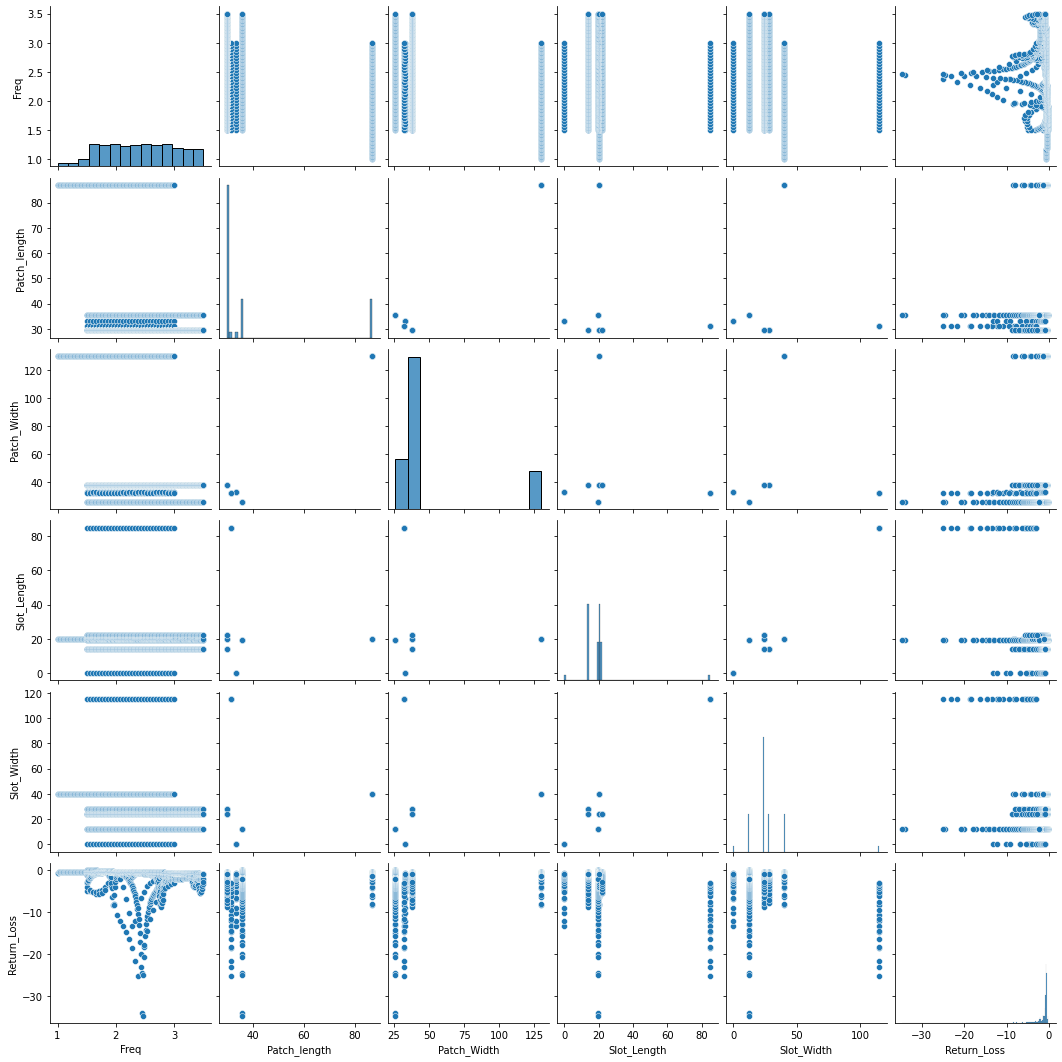

In [10]:
sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freq', ylabel='Return_Loss'>

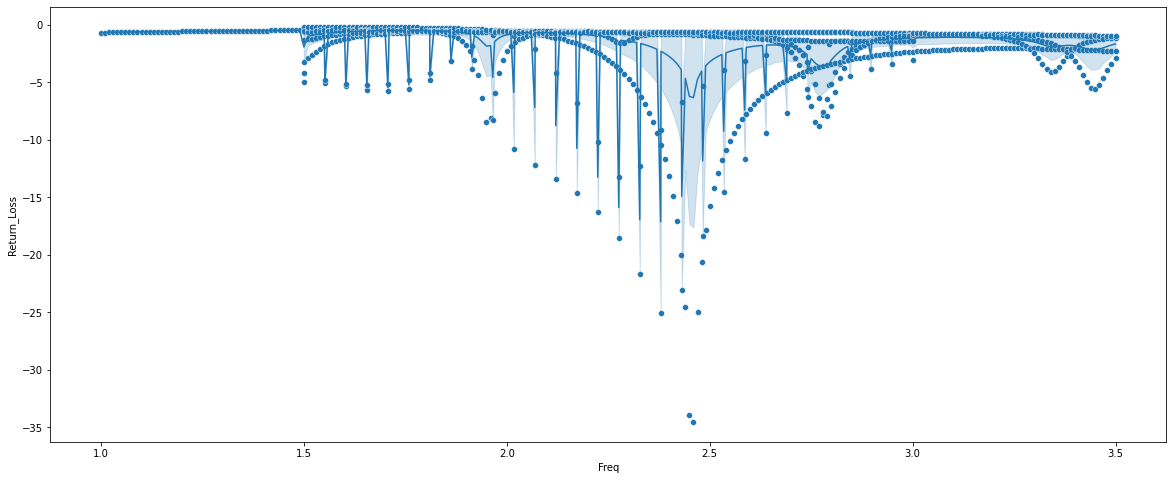

In [25]:
# df.query('Patch_length == 0')
# df.query('Return_Loss < -30')
plt.figure(figsize=(20,8))
sns.scatterplot(df.Freq,df.Return_Loss)
sns.lineplot(df.Freq,df.Return_Loss)

In [13]:
df_useful = df.query('Return_Loss <-10')

In [22]:
df_useful.reset_index(drop=True)

,Freq,Patch_length,Patch_Width,Slot_Length,Slot_Width,Return_Loss
0,2.017241,31.0,32,85.0,115,-10.808005
1,2.068966,31.0,32,85.0,115,-12.211868
2,2.120690,31.0,32,85.0,115,-13.376440
3,2.172414,31.0,32,85.0,115,-14.659719
4,2.224138,31.0,32,85.0,115,-16.282618
5,2.224138,33.0,33,0.0,0,-10.202952
6,2.275862,31.0,32,85.0,115,-18.499373
7,2.275862,33.0,33,0.0,0,-13.254084
8,2.327586,33.0,33,0.0,0,-12.229729
9,2.327586,31.0,32,85.0,115,-21.650557


In [16]:
df.query('Freq > 2.3 & Freq < 2.5')

,Freq,Patch_length,Patch_Width,Slot_Length,Slot_Width,Return_Loss
568,2.31,87.0,130,20.0,40,-0.693906
569,2.31,35.5,26,19.5,12,-5.181679
570,2.31,29.4,38,22.0,24,-0.629618
571,2.31,29.4,38,14.0,28,-0.590434
572,2.31,29.4,38,14.0,24,-0.616982
...,...,...,...,...,...,...
685,2.49,29.4,38,14.0,28,-0.665129
686,2.49,29.4,38,14.0,24,-0.701276
687,2.49,29.4,38,20.0,24,-0.628530
688,2.49,87.0,130,20.0,40,-0.910903


In [17]:
df.Freq.nunique()

279

In [32]:
x = df.iloc[:,[0,5]] # taken input as freq and Return Loss

In [34]:
y = df.iloc[:,1:5]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dtr = DecisionTreeRegressor()

In [51]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [53]:
y_pred = dtr.predict(x_test)

In [54]:
y_pred

array([[ 29.4,  38. ,  20. ,  24. ],
       [ 29.4,  38. ,  14. ,  24. ],
       [ 87. , 130. ,  20. ,  40. ],
       ...,
       [ 87. , 130. ,  20. ,  40. ],
       [ 29.4,  38. ,  14. ,  24. ],
       [ 87. , 130. ,  20. ,  40. ]])

In [57]:
dtr.score(x_train,y_train)*100

100.0

In [73]:
dtr.predict([[4,-15]])

array([[35.5, 26. , 19.5, 12. ]])

In [74]:
df.query('Freq == 3.5')

,Freq,Patch_length,Patch_Width,Slot_Length,Slot_Width,Return_Loss
1261,3.5,35.5,26,19.5,12,-2.292020
1262,3.5,29.4,38,20.0,24,-1.118060
1263,3.5,29.4,38,22.0,24,-2.900641
1264,3.5,29.4,38,14.0,28,-1.010659
1265,3.5,29.4,38,14.0,24,-0.969920


In [68]:
df.Freq.max()

3.5

# Random Forest

In [59]:
df

,Freq,Patch_length,Patch_Width,Slot_Length,Slot_Width,Return_Loss
0,1.00,87.0,130,20.0,40,-0.688908
1,1.01,87.0,130,20.0,40,-0.665553
2,1.02,87.0,130,20.0,40,-0.648568
3,1.03,87.0,130,20.0,40,-0.636214
4,1.04,87.0,130,20.0,40,-0.627207
...,...,...,...,...,...,...
1261,3.50,35.5,26,19.5,12,-2.292020
1262,3.50,29.4,38,20.0,24,-1.118060
1263,3.50,29.4,38,22.0,24,-2.900641
1264,3.50,29.4,38,14.0,28,-1.010659


In [62]:
xr = df.iloc[:,[0,-1]] 

In [66]:
yr = df.iloc[:,1:5]

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
xr_train,xr_test,yr_train,yr_test = train_test_split(xr,yr,test_size=0.2,random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler

In [72]:
scr = StandardScaler() 

In [73]:
xr_train = scr.fit_transform(xr_train)

In [74]:
xr_test = scr.fit_transform(xr_test)

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf = RandomForestRegressor()

In [77]:
rf.fit(xr_train,yr_train)

RandomForestRegressor()

In [78]:
rf.predict(xr_test)

array([[ 29.522,  37.76 ,  20.63 ,  23.76 ],
       [ 29.4  ,  38.   ,  14.   ,  24.64 ],
       [ 63.642,  83.56 ,  19.79 ,  27.76 ],
       ...,
       [ 86.424, 129.08 ,  20.   ,  39.84 ],
       [ 31.189,  40.64 ,  14.315,  24.52 ],
       [ 50.712,  72.04 ,  20.98 ,  30.   ]])

In [79]:
rf.score(xr_train,yr_train) * 100

91.25413075818986

In [80]:
# xr_train
df.query('Freq == 2.4')

,Freq,Patch_length,Patch_Width,Slot_Length,Slot_Width,Return_Loss
626,2.4,29.4,38,14.0,28,-0.615066
627,2.4,29.4,38,20.0,24,-0.673970
628,2.4,87.0,130,20.0,40,-0.788554
629,2.4,35.5,26,19.5,12,-13.108028
630,2.4,29.4,38,14.0,24,-0.643529
631,2.4,29.4,38,22.0,24,-0.617459


In [81]:
rf.predict([[2.4,-15]])

array([[31.241, 33.38 , 43.045, 53.37 ]])

In [82]:
rf.predict([[2.4,-30]])

array([[31.241, 33.38 , 43.045, 53.37 ]])

In [83]:
rf.predict([[2.4,-10]])

array([[31.241, 33.38 , 43.045, 53.37 ]])

In [85]:
# df['Slot_Length'].max()
# df[df['Slot_Length']>40]